# Reconstruct 3D image for Figure 3b

Data: 3D blue and green channle images

## Libraries

In [1]:
import numpy as np
import cv2
import myfunctions as myfunc
from astropy.io import fits
from skimage.transform import rescale
import matplotlib.pyplot as plt
import tifffile

## Directories

In [1]:
data = '../data/3D/raw/'
result = '../result/'

## Parameters

In [4]:
# Acquisition parameters
theta = np.arcsin(0.62/1.33) # angle of light sheet in water
pixelsize = 6.5 # pixel size of the image sensor in um
mag = 200/9 # magnification rate of imaging
fps = 200 # frame per second in Hz
F_indexmismatch = 1.412 # axial elongation factor due to refractive-index mismatch of remote focusing
polarity =  0 # forward or reverse scanning direction
coeff_405 = 0.994

#velocity calculation
mean_aspect_ratio = 11.64 # mean aspect ratio of beads in the image before reconstruction
v = mean_aspect_ratio*fps*(pixelsize/mag) # scanning velocity in the flow direction in um/s

In [ ]:
#calibration parameters
#kernel_movmean = 10
shift1_405 = (-10, 0, 0)
#shift1_637 = (5,3,0)
p22 = [-4.2206e-7,  8.9098e-4, 2.2979]
p27 = [-6.4205e-7,  0.0014, 1.6154]
#p30 = [ 1.3080e-6,  -2.5595e-3,  0.7243]
#p35 = [ -7.8515e-7, 2.0224e-3, -0.9691]

In [3]:
file_405 = 'id551_MDCK_unit_acousticon_sheathon_01_200Hz_405_250mW_488_150mW_405.fits'
file_488 = 'id551_MDCK_unit_acousticon_sheathon_01_200Hz_405_250mW_488_150mW_488.fits'

In [2]:
#calibration parameters
shift1_405 = (-10, 0, 0)
p22 = [-4.2206e-7,  8.9098e-4, 2.2979]
p27 = [-6.4205e-7,  0.0014, 1.6154]

In [7]:
# choose which channesl to reconstruct
reconst_405 = True
reconst_488 = True

# whether to print loop counter
print_loop = False

In [9]:
(dim_flow, dim_height, dim_width)= fits.getdata(path_rawdata+file_405).shape

In [10]:
if reconst_405:
    # prepare an array to store the reconstructedf image
    T_405, dim_height_recon_405, dim_flow_recon_405 = myfunc.get_affine_parameters(theta,pixelsize,mag, fps, v, F_indexmismatch/coeff_405, polarity, dim_height, dim_flow)
    img_stack = np.float32(np.transpose(fits.getdata(path_rawdata+file_405), [1,2,0]))
    img_out_405 = np.float32(np.zeros((dim_height_recon_405, dim_width, dim_flow_recon_405)))
    print('405 initialized')

if reconst_405:
    # reconstruct and spatially calibrate 3D image
    if polarity == 1:
        img_stack = np.flip(img_stack, 0)
    img_stack = np.roll(img_stack, shift1_405, axis=(0,1,2))
    myfunc.affine_transform_3D(img_out_405, img_stack[:,:,0:dim_flow-1], T_405[:2], dim_width, dim_flow_recon_405, dim_height_recon_405, '405', print_loop)
    img_out_405 = np.flip(img_out_405, axis=0)

    X, Y, Z = img_out_405.shape
    x, y = np.meshgrid(np.arange(Z), np.arange(X))
    for k in np.arange(Y):
       offset405_Z = p27[2] + p27[1] * k + p27[0] * k**2
       offset405_X = p22[2] + p22[1] * k + p22[0] * k**2
       xq405, yq405 = np.float32(np.meshgrid(np.arange(Z) + offset405_Z, np.arange(X) + offset405_X))
       img_out_405[:,k,:] = cv2.remap(img_out_405[:,k,:], xq405, yq405, cv2.INTER_LINEAR)
       print('coordiate calibration 405:', str(k) + '/' + str(Y))

405 initialized
coordiate calibration 405: 0/2560
coordiate calibration 405: 1/2560
coordiate calibration 405: 2/2560
coordiate calibration 405: 3/2560
coordiate calibration 405: 4/2560
coordiate calibration 405: 5/2560
coordiate calibration 405: 6/2560
coordiate calibration 405: 7/2560
coordiate calibration 405: 8/2560
coordiate calibration 405: 9/2560
coordiate calibration 405: 10/2560
coordiate calibration 405: 11/2560
coordiate calibration 405: 12/2560
coordiate calibration 405: 13/2560
coordiate calibration 405: 14/2560
coordiate calibration 405: 15/2560
coordiate calibration 405: 16/2560
coordiate calibration 405: 17/2560
coordiate calibration 405: 18/2560
coordiate calibration 405: 19/2560
coordiate calibration 405: 20/2560
coordiate calibration 405: 21/2560
coordiate calibration 405: 22/2560
coordiate calibration 405: 23/2560
coordiate calibration 405: 24/2560
coordiate calibration 405: 25/2560
coordiate calibration 405: 26/2560
coordiate calibration 405: 27/2560
coordiate cali

In [11]:
if reconst_488:
    # prepare an array to store the reconstructedf image
    T_488, dim_height_recon_488, dim_flow_recon_488 = myfunc.get_affine_parameters(theta,pixelsize,mag, fps, v, F_indexmismatch, polarity, dim_height, dim_flow)
    img_stack = np.float32(np.transpose(fits.getdata(path_rawdata+file_488), [1,2,0]))
    img_out_488 = np.float32(np.zeros((dim_height_recon_488, dim_width, dim_flow_recon_488)))
    #img_out_488_2 = img_out_488
    print('488 initialized')

if reconst_488:
    # reconstruct 3D image
    if polarity == 1:
        img_stack = np.flip(img_stack, 0)
    myfunc.affine_transform_3D(img_out_488, img_stack[:,:,0:dim_flow-1], T_488[:2], dim_width, dim_flow_recon_488, dim_height_recon_488, '488', print_loop)
    img_out_488 = np.flip(img_out_488, axis=0)

488 initialized


In [12]:
print(img_out_405.shape)
print(img_out_488.shape)

(644, 2560, 9873)
(640, 2560, 9871)


In [14]:
img_out_405 = img_out_405[:img_out_488.shape[0], : , :img_out_488.shape[2]]
img_out_405.shape

(640, 2560, 9871)

In [15]:
# calculate the number of pixel measured in one second
pixel_1sec = int(np.rint(mean_aspect_ratio*fps))

In [16]:
# calculate how many pixels increased adter reconstruction in the flow direction
increased_length = img_out_488.shape[2] - int(np.rint(mean_aspect_ratio*819))
# calculate how many pixels are reduced to adjust the size of the reconstructed image
# so that the original image was measured in one seconed
reducton_length = int(np.rint(increased_length*400/640))

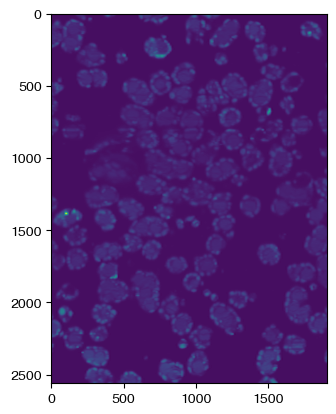

In [18]:
plt.imshow(img_out_488[450, ..., 7190+reducton_length:7190+pixel_1sec-reducton_length])

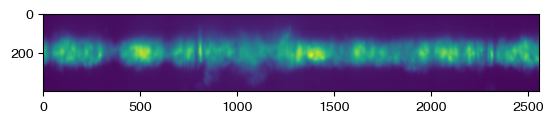

In [19]:
plt.imshow(img_out_488[240:640, :, 7190+reducton_length:7190+pixel_1sec-reducton_length].sum(axis=2))

In [20]:
# crope and resize the reconstructed images
img_out_405_cropped = rescale(img_out_405[240:640, :, 7190+reducton_length:7190+pixel_1sec-reducton_length], 0.5, anti_aliasing=True)
img_out_488_cropped = rescale(img_out_488[240:640, :, 7190+reducton_length:7190+pixel_1sec-reducton_length], 0.5, anti_aliasing=True)

In [21]:
print(img_out_405_cropped.shape)
print(img_out_488_cropped.shape)

(200, 1280, 953)
(200, 1280, 953)


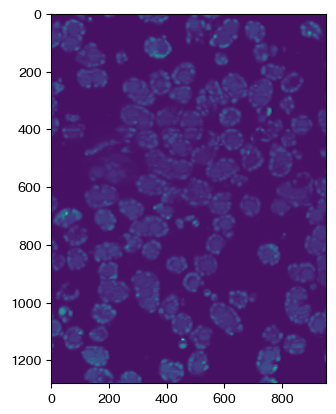

In [22]:
plt.imshow(img_out_488_cropped[100, ...])

In [23]:
tifffile.imwrite('../result/id551_MDCK_unit_acousticon_sheathon_01_200Hz_405_250mW_488_150mW_405_reconstructed_cropped.tif', img_out_405_cropped)
tifffile.imwrite('../result/id551_MDCK_unit_acousticon_sheathon_01_200Hz_405_250mW_488_150mW_488_reconstructed_cropped.tif', img_out_488_cropped)

In [24]:
tifffile.imwrite('../result/id551_MDCK_unit_acousticon_sheathon_01_200Hz_405_250mW_488_150mW_405_reconstructed_cropped_z100.tif', img_out_405_cropped[100, ...])
tifffile.imwrite('../result/id551_MDCK_unit_acousticon_sheathon_01_200Hz_405_250mW_488_150mW_488_reconstructed_cropped_z100.tif', img_out_488_cropped[100, ...])